In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

%config InlineBackend.figure_format = 'retina'

In [3]:
stf = pd.read_csv('/Users/artyom/Downloads/Task from Avito.BI team/users_evaluation_of_satisfaction.csv')
stf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217533 entries, 0 to 217532
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   request_id                217414 non-null  object
 1   result_mentioned_by_user  217533 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [4]:
sup_t = pd.read_csv('/Users/artyom/Downloads/Task from Avito.BI team/support_tickets.csv')

In [5]:
sup_t_stf = pd.merge(left=sup_t, right=stf, left_on='request_id', right_on='request_id', how='inner')
sup_t_stf.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо
1,372 546 513,Технические вопросы,Загрузка фото,Решено,280bf0e6-6c0c-4eb1-b093-ac2eadd20cdb,2015-12-11 13:39:00,2015-12-16 05:20:00,Отлично
2,369 694 997,Технические вопросы,Доступ к сайту,Решено,045a97f4-4747-45e0-a3a9-441081e06c08,2015-12-17 22:46:00,2015-12-20 20:59:00,Отлично
3,3 254 820,Технические вопросы,Доступ к сайту,Решено,6d12e450-7aee-4842-b9cf-ee9a2824f892,2015-09-04 12:20:00,2015-09-05 10:02:00,Отлично
4,366 077 368,Технические вопросы,Доступ к сайту,Решено,f25c8846-9e55-4b15-9a27-6e24ca9e7922,2015-11-11 10:54:00,2015-11-14 08:53:00,Хорошо


In [6]:
users_items = pd.read_csv('/Users/artyom/Downloads/Task from Avito.BI team/new_items_by_support_users.csv')
users_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18559923 entries, 0 to 18559922
Data columns (total 7 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   user_id                  object
 1   user_registration_time   object
 2   user_first_listing_date  object
 3   item_id                  object
 4   item_starttime           object
 5   item_category            object
 6   item_subcategory         object
dtypes: object(7)
memory usage: 991.2+ MB


In [7]:
users_items.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


In [8]:
sup_t_stf_bad = sup_t_stf[sup_t_stf['result_mentioned_by_user'] == 'Не удовлетворительно']

In [9]:
users_item_bad_stf = pd.merge(left=users_items, right=sup_t_stf_bad, left_on='user_id', right_on='user_id', how='inner')

In [10]:
users_item_bad_stf.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
0,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,8 547 750 079,2014-01-01 10:26:38,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
1,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,10 750 000 262,2014-01-27 12:41:21,Транспорт,Запчасти и аксессуары,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
2,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,10 661 751 827,2014-01-26 15:15:01,Транспорт,Мотоциклы и мототехника,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
3,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,11 350 750 059,2014-02-02 17:45:50,Работа,Резюме,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
4,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,11 792 500 634,2014-02-07 17:05:23,Бытовая электроника,Телефоны,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно


In [11]:
users_item_bad_stf = users_item_bad_stf[users_item_bad_stf['item_starttime'] > '2015-06-01 00:00:00']

In [12]:
users_item_bad_stf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502109 entries, 17 to 3156548
Data columns (total 14 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   user_id                   1502109 non-null  object
 1   user_registration_time    1502109 non-null  object
 2   user_first_listing_date   1502109 non-null  object
 3   item_id                   1502109 non-null  object
 4   item_starttime            1502109 non-null  object
 5   item_category             1502109 non-null  object
 6   item_subcategory          1502109 non-null  object
 7   ticket_category           1502109 non-null  object
 8   ticket_subcategory        1502109 non-null  object
 9   current_state             1502109 non-null  object
 10  request_id                1502109 non-null  object
 11  activity_start_dt         1502109 non-null  object
 12  fact_reaction_dt          1502109 non-null  object
 13  result_mentioned_by_user  1502109 non-nul

In [13]:
from datetime import datetime, timedelta
import math

def str_to_date(s):
     return datetime.strptime(s, '%Y-%m-%d %H:%M:%S')

def c_days(s):
     return s.days

def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

def amount_NAN(x):
    count = 0
    for el in x:
        if math.isnan(el): count += 1
    return count
    

In [14]:
users_item_bad_stf_score_before_call = users_item_bad_stf[(users_item_bad_stf['item_starttime'] < users_item_bad_stf['fact_reaction_dt'])
                                                          & (users_item_bad_stf['item_starttime'].apply(str_to_date) > \
                                                             users_item_bad_stf['fact_reaction_dt'].apply(str_to_date) - timedelta(days=90))]                                         

In [15]:
users_item_bad_stf_score_before_call.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
19,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,230 518 250 544,2015-11-15 17:01:15,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
26,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,230 528 250 463,2015-11-15 17:26:34,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
28,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,213 684 500 230,2015-10-05 16:11:59,Недвижимость,Квартиры,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
29,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,217 941 750 268,2015-10-16 14:19:10,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
920,1 264 839,2013-02-18 09:43:49,2013-02-18 09:51:16,192 174 500 129,2015-08-16 20:59:56,Для дома и дачи,Ремонт и строительство,Блокировки и отклонения,Отклоненное объявление,Решено,1da9b332-2046-49aa-bb78-660ba5874028,2015-11-07 11:31:00,2015-11-10 16:20:00,Не удовлетворительно


In [16]:
not_stf_amount_per_user_before = users_item_bad_stf_score_before_call.groupby('user_id')['user_id'].count()

In [18]:
users_item_bad_stf_score_after_call = users_item_bad_stf[(users_item_bad_stf['item_starttime'] > users_item_bad_stf['fact_reaction_dt'])
                                                          & (users_item_bad_stf['item_starttime'].apply(str_to_date) < \
                                                             users_item_bad_stf['fact_reaction_dt'].apply(str_to_date) + timedelta(days=90))]                                         

In [19]:
users_item_bad_stf_score_after_call.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
20,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,232 044 500 850,2015-11-20 11:41:03,Работа,Резюме,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
22,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,250 646 000 093,2016-01-15 19:04:22,Для дома и дачи,Ремонт и строительство,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
23,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,257 573 000 305,2016-01-31 09:51:16,Личные вещи,Часы и украшения,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,Не удовлетворительно
1024,1 264 839,2013-02-18 09:43:49,2013-02-18 09:51:16,234 176 500 134,2015-11-26 13:18:30,Транспорт,Запчасти и аксессуары,Блокировки и отклонения,Отклоненное объявление,Решено,1da9b332-2046-49aa-bb78-660ba5874028,2015-11-07 11:31:00,2015-11-10 16:20:00,Не удовлетворительно
1025,1 264 839,2013-02-18 09:43:49,2013-02-18 09:51:16,234 176 500 134,2015-11-26 13:18:30,Транспорт,Запчасти и аксессуары,Блокировки и отклонения,Отклоненное объявление,Решено,334745ee-a8e1-4566-bdda-4e03540cfb83,2015-11-09 15:18:00,2015-11-14 14:54:00,Не удовлетворительно


In [20]:
not_stf_amount_per_user_after = users_item_bad_stf_score_after_call.groupby('user_id')['user_id'].count()

In [22]:
bad_stf_users_gone = amount_NAN(not_stf_amount_per_user_after / not_stf_amount_per_user_before) / len(not_stf_amount_per_user_before)

In [23]:
bad_stf_users_gone

0.38242398408638817

In [24]:
conversion_bad_stf = (not_stf_amount_per_user_after / not_stf_amount_per_user_before).dropna()

In [26]:
conversion_bad_stf.median()

0.7407407407407407

In [27]:
sup_t_stf_not_bad = sup_t_stf[sup_t_stf['result_mentioned_by_user'] != 'Не удовлетворительно']

In [28]:
users_item_not_bad_stf = pd.merge(left=users_items, right=sup_t_stf_not_bad, left_on='user_id', right_on='user_id', how='inner')

In [29]:
users_item_not_bad_stf.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,Нейтрально
1,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 745 001 122,2014-01-03 21:57:17,Бытовая электроника,Аудио и видео,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,Нейтрально
2,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,9 117 002 008,2014-01-08 13:14:42,Транспорт,Автомобили,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,Нейтрально
3,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,9 229 500 613,2014-01-09 20:45:54,Транспорт,Автомобили,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,Нейтрально
4,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,9 801 750 955,2014-01-16 22:10:12,Транспорт,Запчасти и аксессуары,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,Нейтрально


In [30]:
users_item_not_bad_stf = users_item_not_bad_stf[users_item_not_bad_stf['item_starttime'] > '2015-06-01 00:00:00']

In [32]:
users_item_not_bad_stf_score_before_call = users_item_not_bad_stf[(users_item_not_bad_stf['item_starttime'] < users_item_not_bad_stf['fact_reaction_dt'])
                                                          & (users_item_not_bad_stf['item_starttime'].apply(str_to_date) > \
                                                             users_item_not_bad_stf['fact_reaction_dt'].apply(str_to_date) - timedelta(days=90))]                                         

In [35]:
stf_amount_per_user_before = users_item_not_bad_stf_score_before_call.groupby('user_id')['user_id'].count()

In [37]:
users_item_not_bad_stf_score_after_call = users_item_not_bad_stf[(users_item_not_bad_stf['item_starttime'] > users_item_not_bad_stf['fact_reaction_dt'])
                                                          & (users_item_not_bad_stf['item_starttime'].apply(str_to_date) < \
                                                             users_item_not_bad_stf['fact_reaction_dt'].apply(str_to_date) + timedelta(days=90))]                                         

In [38]:
stf_amount_per_user_after = users_item_not_bad_stf_score_after_call.groupby('user_id')['user_id'].count()

In [40]:
not_bad_stf_users_gone = amount_NAN(stf_amount_per_user_after / stf_amount_per_user_before) / len(stf_amount_per_user_before)

In [41]:
not_bad_stf_users_gone

0.4179091818906587

In [42]:
conversion_not_bad_stf = (stf_amount_per_user_after / stf_amount_per_user_before).dropna()

In [43]:
conversion_not_bad_stf.median()

0.88

In [44]:
sup_t_stf_perf = sup_t_stf[sup_t_stf['result_mentioned_by_user'] == 'Отлично']

In [45]:
users_item_perf_stf = pd.merge(left=users_items, right=sup_t_stf_perf, left_on='user_id', right_on='user_id', how='inner')

In [46]:
users_item_perf_stf = users_item_perf_stf[users_item_perf_stf['item_starttime'] > '2015-06-01 00:00:00']

In [47]:
users_item_perf_stf_score_before_call = users_item_perf_stf[(users_item_perf_stf['item_starttime'] < users_item_perf_stf['fact_reaction_dt'])
                                                          & (users_item_perf_stf['item_starttime'].apply(str_to_date) > \
                                                             users_item_perf_stf['fact_reaction_dt'].apply(str_to_date) - timedelta(days=90))]                                         

In [48]:
users_item_perf_stf_score_before_call.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
139,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,207 842 000 674,2015-09-22 14:41:22,Транспорт,Запчасти и аксессуары,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично
140,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,210 217 000 070,2015-09-28 06:05:43,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично
141,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,211 016 500 069,2015-09-30 07:26:31,Транспорт,Запчасти и аксессуары,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично
143,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,207 102 000 023,2015-09-20 20:38:05,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично
144,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,207 871 000 159,2015-09-22 18:18:36,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично


In [50]:
perf_stf_amount_per_user_before = users_item_perf_stf_score_before_call.groupby('user_id')['user_id'].count()

In [52]:
users_item_perf_stf_score_after_call = users_item_perf_stf[(users_item_perf_stf['item_starttime'] > users_item_perf_stf['fact_reaction_dt'])
                                                          & (users_item_perf_stf['item_starttime'].apply(str_to_date) < \
                                                             users_item_perf_stf['fact_reaction_dt'].apply(str_to_date) + timedelta(days=90))]                                         

In [53]:
users_item_perf_stf_score_after_call.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
174,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,236 841 750 254,2015-12-04 18:38:23,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично
176,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,241 368 500 063,2015-12-24 01:45:32,Услуги,Предложение услуг,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично
177,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,249 659 000 045,2016-01-13 18:21:48,Недвижимость,Квартиры,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично
178,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,251 973 750 408,2016-01-18 19:12:23,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично
179,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,249 518 000 236,2016-01-13 11:51:30,Недвижимость,Гаражи и машиноместа,Блокировки и отклонения,Заблокированная учетная запись,Решено,8a587830-8150-47e5-a0fa-29b159b2a145,2015-11-05 09:15:00,2015-11-09 11:38:00,Отлично


In [54]:
perf_stf_amount_per_user_after = users_item_perf_stf_score_after_call.groupby('user_id')['user_id'].count()

In [56]:
conversion_perf_stf = (perf_stf_amount_per_user_after / perf_stf_amount_per_user_before).dropna()

In [57]:
perf_stf_users_gone = amount_NAN(perf_stf_amount_per_user_after / perf_stf_amount_per_user_before) / len(perf_stf_amount_per_user_before)

In [58]:
perf_stf_users_gone

0.44194634517215164

In [59]:
conversion_perf_stf.median()

0.9655172413793104

Text(0, 0.5, '')

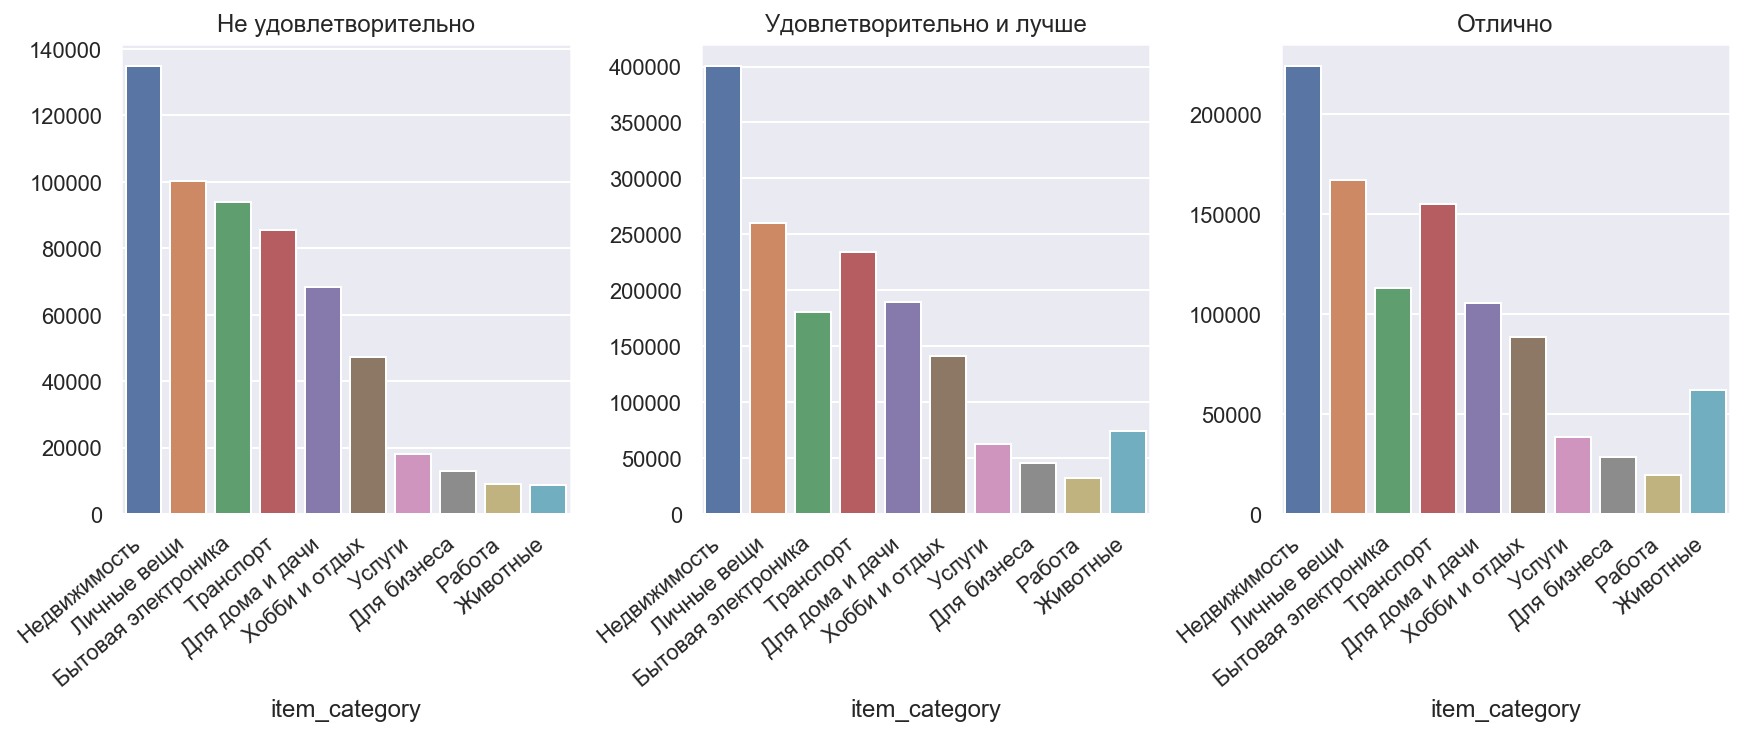

In [108]:
fg = plt.figure(figsize=(12, 5), constrained_layout=True)
gs = fg.add_gridspec(1, 3)

fig_ax_1 = fg.add_subplot(gs[0, 0])
fig_ax_1.set_title('Не удовлетворительно')
bad_satisfaction = sns.countplot(x='item_category', data=users_item_bad_stf_score_before_call,\
                                 order=users_item_bad_stf_score_before_call['item_category'].value_counts().index)
bad_satisfaction.set_xticklabels(bad_satisfaction.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.ylabel('')

fig_ax_2 = fg.add_subplot(gs[0, 1])
fig_ax_2.set_title('Удовлетворительно и лучше')
not_bad_satisfaction = sns.countplot(x='item_category', data=users_item_not_bad_stf_score_before_call, \
                                    order=users_item_bad_stf_score_before_call['item_category'].value_counts().index)
not_bad_satisfaction.set_xticklabels(not_bad_satisfaction.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.ylabel('')

fig_ax_3 = fg.add_subplot(gs[0, 2])
fig_ax_3.set_title('Отлично')
perf_satisfaction = sns.countplot(x='item_category', data=users_item_perf_stf_score_before_call, \
                                 order=users_item_bad_stf_score_before_call['item_category'].value_counts().index)
perf_satisfaction.set_xticklabels(perf_satisfaction.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.ylabel('')

In [66]:
conversion = pd.DataFrame(index=['Не удовлетворительно', 'Удовлетворительно и лучше', 'Отлично'], columns=['percent'])
conversion.loc['Не удовлетворительно', 'percent'] = toFixed(conversion_bad_stf.median() * 100, 2)
conversion.loc['Удовлетворительно и лучше', 'percent'] = toFixed(conversion_not_bad_stf.median() * 100, 2)
conversion.loc['Отлично', 'percent'] = toFixed(conversion_perf_stf.median() * 100, 2)

In [67]:
conversion

,percent
Не удовлетворительно,74.07
Удовлетворительно и лучше,88.00
Отлично,96.55


In [81]:
res = pd.DataFrame(index=['Не удовлетворительно', 'Удовлетворительно и лучше', 'Отлично'], columns=['amount', 'conversion', 'users_before'])
res.loc['Не удовлетворительно', 'amount'] = not_stf_amount_per_user_before.median()
res.loc['Удовлетворительно и лучше', 'amount'] = stf_amount_per_user_before.median()
res.loc['Отлично', 'amount'] = perf_stf_amount_per_user_before.median()
res.loc['Не удовлетворительно', 'conversion'] = toFixed(conversion_bad_stf.median(), 2)
res.loc['Удовлетворительно и лучше','conversion'] = toFixed(conversion_not_bad_stf.median(), 2)
res.loc['Отлично', 'conversion'] = toFixed(conversion_perf_stf.median(), 2)
res.loc['Не удовлетворительно', 'users_before'] = len(not_stf_amount_per_user_before)
res.loc['Удовлетворительно и лучше','users_before'] = len(stf_amount_per_user_before)
res.loc['Отлично', 'users_before'] = len(perf_stf_amount_per_user_before)

In [82]:
res = res.astype(float)
res

,amount,conversion,users_before
Не удовлетворительно,6.0,0.74,14076.0
Удовлетворительно и лучше,5.0,0.88,58953.0
Отлично,5.0,0.97,36828.0


In [83]:
delta_stf = res.loc['Удовлетворительно и лучше','conversion'] - res.loc['Не удовлетворительно', 'conversion']
delta_perf = res.loc['Отлично','conversion'] - res.loc['Не удовлетворительно', 'conversion']

miss_annonce_com_stf = delta_stf * res.loc['Не удовлетворительно', 'users_before'] * \
                        res.loc['Не удовлетворительно', 'amount']
miss_annonce_com_per = delta_perf * res.loc['Не удовлетворительно', 'users_before'] * \
                        res.loc['Не удовлетворительно', 'amount']

In [92]:
print('Количество потерянных объявлений в сравнение с "Отличной" конверсией = {}'\
      .format(int(miss_annonce_com_perf)))
print('Количество потерянных объявлений в сравнение с "Удовлетворительной" конверсией = {}'\
      .format(int(miss_annonce_com_stf)))

Количество потерянных объявлений в сравнение с "Отличной" конверсией = 19424
Количество потерянных объявлений в сравнение с "Удовлетворительной" конверсией = 11823


In [93]:
users_gone = pd.DataFrame(index=['Не удовлетворительно', 'Удовлетворительно и лучше', 'Отлично'], columns=['percent'])
users_gone.loc['Не удовлетворительно', 'percent'] = round(bad_stf_users_gone * 100, 2)
users_gone.loc['Удовлетворительно и лучше', 'percent'] = round(not_bad_stf_users_gone * 100, 2)
users_gone.loc['Отлично', 'percent'] = round(perf_stf_users_gone * 100, 2)

In [94]:
users_gone

,percent
Не удовлетворительно,38.24
Удовлетворительно и лучше,41.79
Отлично,44.19


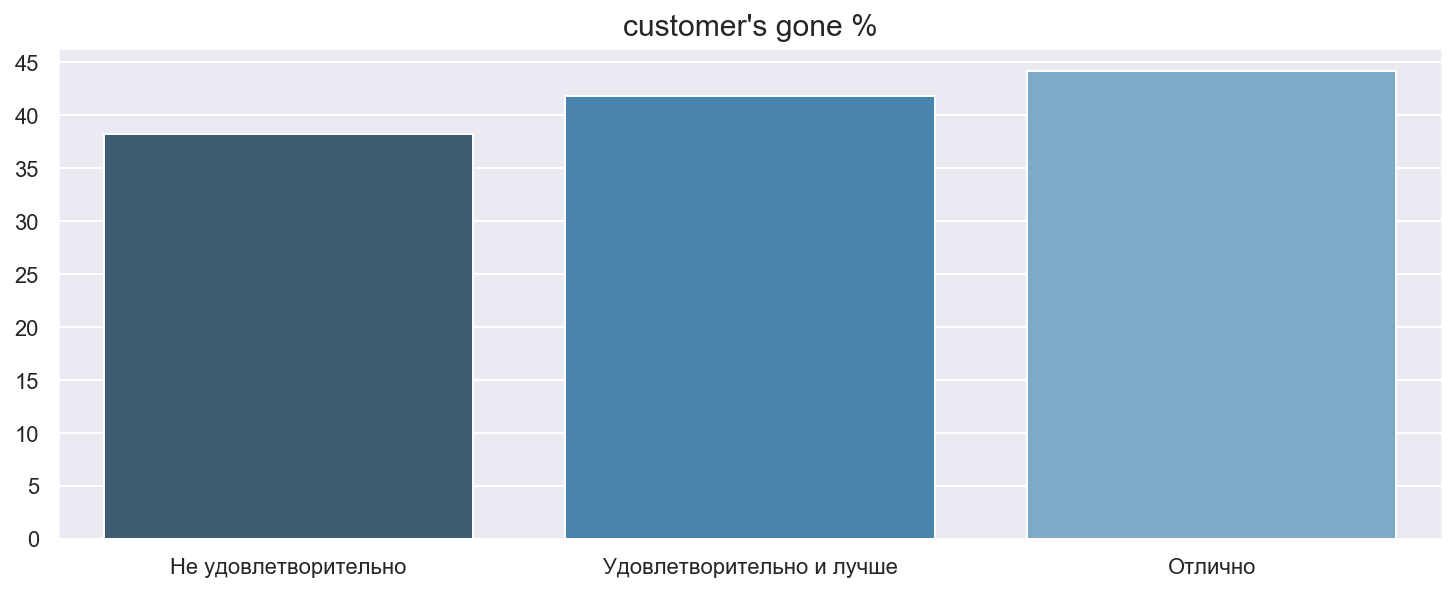

In [141]:
import matplotlib.ticker as ticker

fg = plt.figure(figsize=(10, 4), constrained_layout=True)
users_gone_bar = sns.barplot(users_gone.index, users_gone['percent'], palette="Blues_d")
users_gone_bar.set_title("customer's gone %", fontsize=15)
plt.ylabel('')
users_gone_bar.yaxis.set_major_locator(ticker.MultipleLocator(5))